In [36]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.0f}'.format

In [37]:
df = pd.read_csv('knn_results_scores_dev_analysis.csv')
#previous milestone
df_prev = pd.read_csv('knn_results_scores_analysis_prev_milestone.csv')

In [38]:
df.head(2)

,Unnamed: 0.1,Unnamed: 0,pred_1,pred_2,pred_3,pred_4,chatbot_answer,golden_standard_answer,score,group_predict,group_actual,type_of_error
0,0,0,49,33,30,56,"Pratyush Mishra, Tal Rabin, Andre Scedrov, Jin...",Lin Thi Xuan Phan,3,4,3,Most professors come from another group
1,1,1,15,27,75,49,"Eric Eaton, Adam David Mally, Rajeev Alur, Pra...","Mark Yatskar, Chris Callsion Burch",3,2,8,Most professors come from another group


In [39]:
df_prev.head(2)

,Unnamed: 0.1,Unnamed: 0,pred_1,pred_2,pred_3,pred_4,chatbot_answer,golden_standard_answer,score,group_predict,group_actual,type_of_error
0,0,0,23,75,63,22,"Robin Pemantle, Ryan Baker, Yasmin Kafai, Mark...",I do not know the answer to that,1,1,None,Outputted professors instead of 'I don't know'
1,1,1,23,75,63,22,"Robin Pemantle, Ryan Baker, Yasmin Kafai, Mark...",I am only able to recommend professors that wo...,1,1,None,Outputted professors instead of 'I don't know'


In [40]:
df_prev.type_of_error.value_counts()

All professors come from another group                         20
Expected professor not outputted but similar professors are    10
Most professors come from another group                         9
Ideal                                                           8
Outputted professors instead of 'I don't know'                  2
Name: type_of_error, dtype: int64

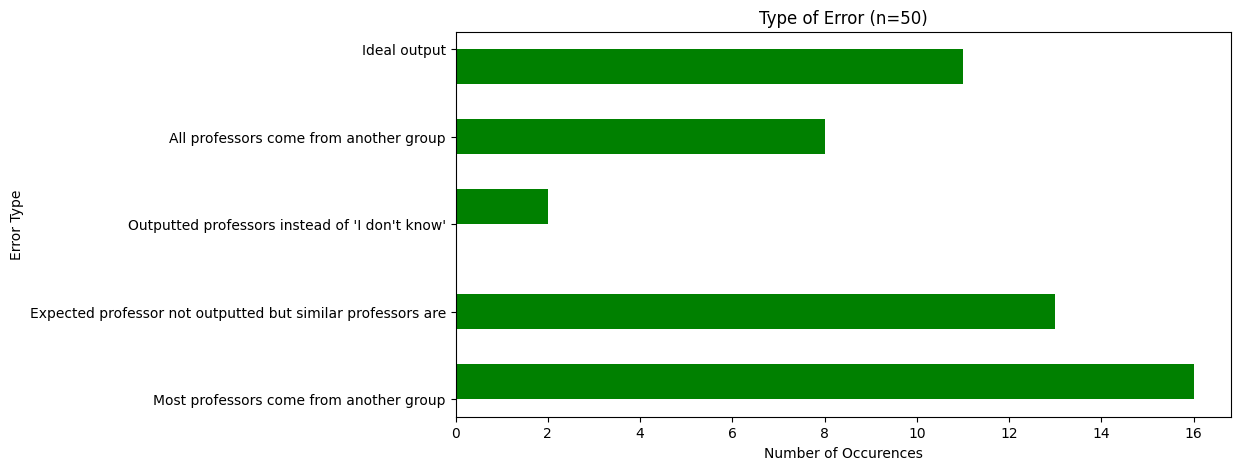

In [41]:
fig = plt.figure(figsize = (10, 5))

plt.hist(df.type_of_error, color ='green', orientation='horizontal')

plt.xlabel("Number of Occurences")
plt.ylabel("Error Type")
plt.title("Type of Error (n=50)")
plt.show()

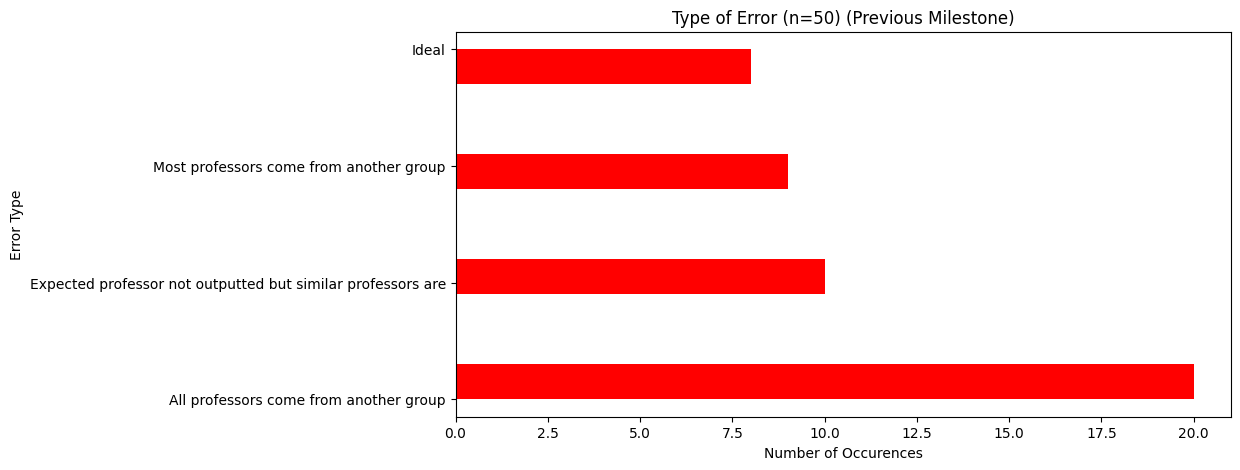

In [51]:
fig = plt.figure(figsize = (10, 5))

plt.hist(df_prev.type_of_error, color ='red', orientation='horizontal')

plt.xlabel("Number of Occurences")
plt.ylabel("Error Type")
plt.title("Type of Error (n=50) (Previous Milestone)")
plt.show()

In [14]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(df['group_predict'], df['group_actual'])
print(cf_matrix)

[[ 1  0  0  0  0  0  0  0]
 [ 3 12  3  0  1  0  5  0]
 [ 0  1  3  0  0  0  0  0]
 [ 2  0  3  1  0  0  3  1]
 [ 0  1  0  0  2  0  0  0]
 [ 1  0  0  0  0  2  0  1]
 [ 0  1  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  1]]


[Text(0, 0.5, 'Group 1'),
 Text(0, 1.5, 'Group 2'),
 Text(0, 2.5, 'Group 3'),
 Text(0, 3.5, 'Group 4'),
 Text(0, 4.5, 'Group 5'),
 Text(0, 5.5, 'Group 6'),
 Text(0, 6.5, 'Group 7'),
 Text(0, 7.5, 'Group 8')]

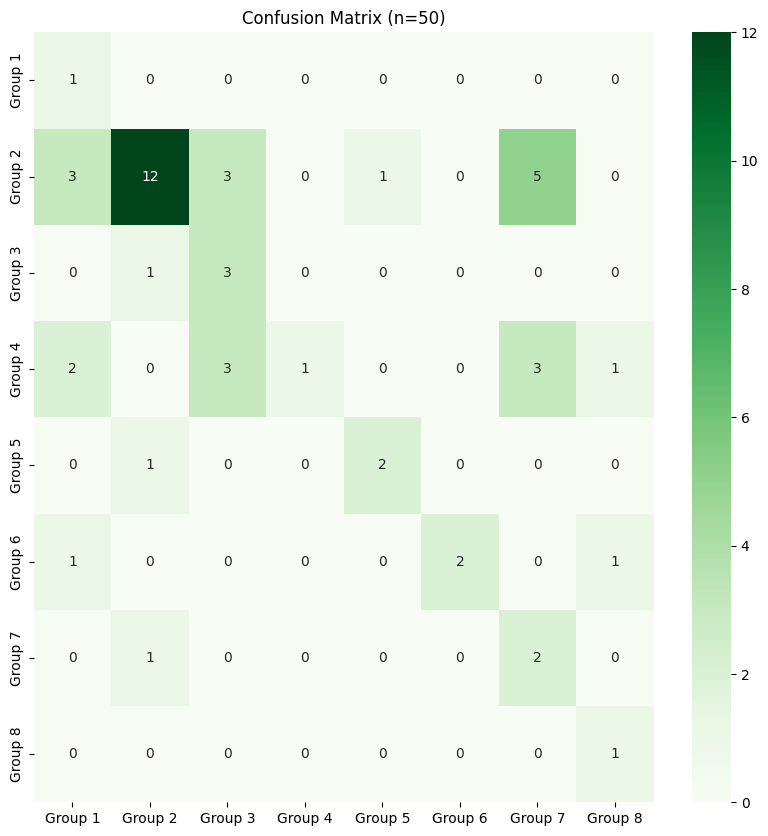

In [29]:
import seaborn as sns

fig = plt.figure(figsize = (10, 10))

ax= plt.subplot()
categories = ['Group 1', 'Group 2', 'Group 3','Group 4', 'Group 5', 'Group 6', 'Group 7', 'Group 8']
sns.heatmap(cf_matrix, annot=True, cmap='Greens')
ax.set_title('Confusion Matrix (n=50)')
ax.
ax.xaxis.set_ticklabels(categories)
ax.yaxis.set_ticklabels(categories)

In [48]:
df_prev = df_prev[df_prev.group_actual != 'None']
df_prev['group_predict'] = df_prev['group_predict'].astype(int)
df_prev['group_actual'] = df_prev['group_actual'].astype(int)

<ipython-input-48-fb52320256ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prev['group_predict'] = df_prev['group_predict'].astype(int)


In [49]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(df_prev['group_predict'], df_prev['group_actual'])
print(cf_matrix)

[[0 1 0 0 0 0 0 1]
 [0 8 0 0 0 0 0 1]
 [0 0 4 0 0 0 0 0]
 [1 0 3 0 0 0 0 0]
 [0 0 0 1 0 0 0 1]
 [0 0 0 0 0 0 0 0]
 [5 5 2 0 0 1 2 4]
 [2 0 0 0 0 0 0 5]]


[Text(0, 0.5, 'Group 1'),
 Text(0, 1.5, 'Group 2'),
 Text(0, 2.5, 'Group 3'),
 Text(0, 3.5, 'Group 4'),
 Text(0, 4.5, 'Group 5'),
 Text(0, 5.5, 'Group 6'),
 Text(0, 6.5, 'Group 7'),
 Text(0, 7.5, 'Group 8')]

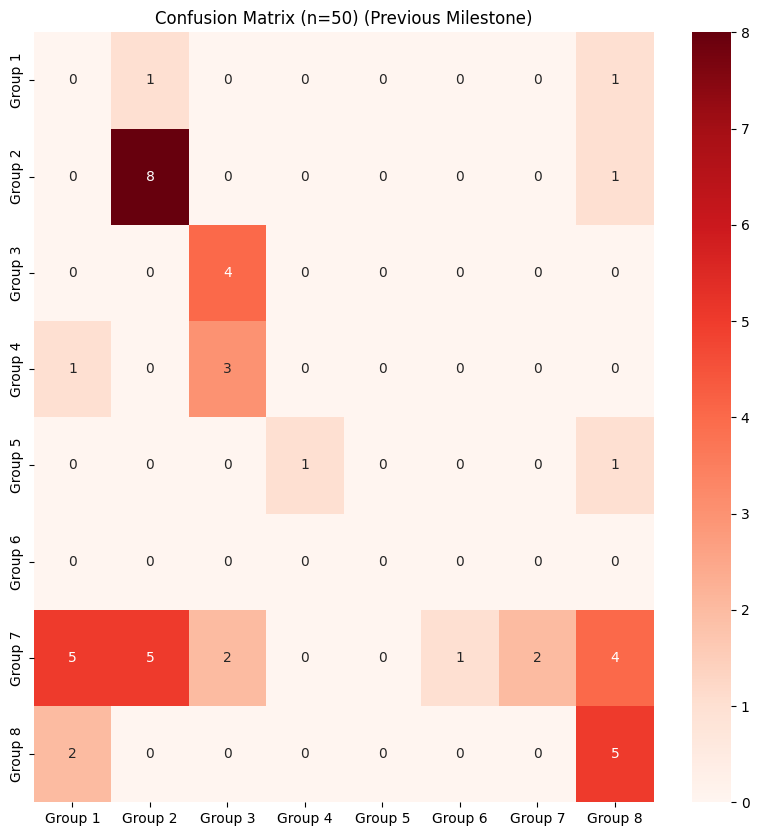

In [53]:
import seaborn as sns

fig = plt.figure(figsize = (10, 10))

ax= plt.subplot()
categories = ['Group 1', 'Group 2', 'Group 3','Group 4', 'Group 5', 'Group 6', 'Group 7', 'Group 8']
sns.heatmap(cf_matrix, annot=True, cmap='Reds')
ax.set_title('Confusion Matrix (n=50) (Previous Milestone)')
ax.xaxis.set_ticklabels(categories)
ax.yaxis.set_ticklabels(categories)